## Question 1

In [1]:
s=50
d=100
learn=0.01
momentum=0.9
cost=0.1*s**2+0.5*d
delivery=d/s+0.1*d
cost_grads=0.2*s
cost_gradd=0.5
delivery_grads=-d/s**2
delivery_gradd=1/s+ 0.1
v_s=0
v_d=0
for i in range(3):
    v_s =momentum*v_s-learn*(cost_grads+delivery_grads)
    v_d =momentum*v_d-learn*(cost_gradd+delivery_gradd)
    s+=v_s
    d+=v_d
    print(f"Iteration {i+1} - Speed: {s}, Distance: {d}")

Iteration 1 - Speed: 49.9004, Distance: 99.9938
Iteration 2 - Speed: 49.71116, Distance: 99.98201999999999
Iteration 3 - Speed: 49.441244, Distance: 99.965218


## Question 2

### Importing the dataset

In [2]:
import pandas as pd
data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/GME_stock.csv')
data.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


### Checking for null values

In [3]:
data.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

### Removing ouliers

In [4]:
data.shape

(4773, 7)

In [5]:
import numpy as np
import scipy.stats as stats
def drop_outlier(data,col_name):
    z= np.abs(stats.zscore(col_name))
    data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
drop_outlier(data,data['open_price'])
drop_outlier(data,data['high_price'])
drop_outlier(data,data['low_price'])
drop_outlier(data,data['close_price'])
drop_outlier(data,data['volume'])

In [6]:
data.shape

(4576, 7)

### Standardising the data

In [7]:
data=data.drop(columns='date')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in data.columns:
    data[i]=sc.fit_transform(data[[i]])
data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price
11,-0.180224,-0.172555,-0.203325,-0.180398,1.908439,0.438470
13,-0.324673,-0.340440,-0.388248,-0.363923,1.634199,0.179071
14,-0.301139,-0.248503,-0.310646,-0.332253,1.480014,0.223834
15,-0.392840,-0.286077,-0.367609,-0.309515,1.446390,0.255972
16,-0.392028,-0.358028,-0.375865,-0.389909,0.942851,0.142342


### Splitting the target and predictors into training and testing

In [8]:
X=data.drop(columns='adjclose_price')
Y=data['adjclose_price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### Importing necessary libraries

In [9]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import regularizers

### Fitting model with L1 Regularization

In [10]:
model = Sequential([ 
    Dense(input_dim=5,units=128, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(units=1, activation='linear')
]) 

In [11]:
model.compile(optimizer='adam', 
              loss='mean_squared_error') 

In [12]:
model.fit(x_train, y_train, epochs=100,  
          batch_size=500,  
          validation_split=0.2) 

Epoch 1/100


2024-03-13 12:28:54.589336: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 17ms/step - loss: 11.5014 - val_loss: 10.7945
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 10.5321 - val_loss: 10.0052
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 9.8109 - val_loss: 9.3730
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 9.2445 - val_loss: 8.8646
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 8.7605 - val_loss: 8.3844
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 8.2773 - val_loss: 7.9033
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 7.8049 - val_loss: 7.4458
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 7.3440 - val_loss: 6.9986
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 6.8993 - val_loss: 6.5601
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 6.4605 - val_loss: 6.1361
Epoch 11/100
6/6 [==================

Epoch 85/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3645 - val_loss: 0.2889
Epoch 86/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3663 - val_loss: 0.2874
Epoch 87/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3678 - val_loss: 0.2874
Epoch 88/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3615 - val_loss: 0.2859
Epoch 89/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3579 - val_loss: 0.2833
Epoch 90/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3664 - val_loss: 0.2809
Epoch 91/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3642 - val_loss: 0.2815
Epoch 92/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3596 - val_loss: 0.2805
Epoch 93/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3601 - val_loss: 0.2794
Epoch 94/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3550 - val_loss: 0.2755
Epoch 95/100
6/6 [==

### Fitting model with L2 Regularization

In [13]:
model1 = Sequential([ 
    Dense(input_dim=5,units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units=1, activation='linear')
]) 

In [14]:
model1.compile(optimizer='adam', 
              loss='mean_squared_error') 

In [15]:
model1.fit(x_train, y_train, epochs=100,  
          batch_size=500,  
          validation_split=0.2) 

Epoch 1/100
6/6 [==============================] - 0s 13ms/step - loss: 2.2964 - val_loss: 1.8373
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 1.7117 - val_loss: 1.4136
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4019 - val_loss: 1.2437
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3349 - val_loss: 1.1970
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.2606 - val_loss: 1.1156
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 1.1736 - val_loss: 1.0709
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 1.1237 - val_loss: 1.0215
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0603 - val_loss: 0.9569
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0030 - val_loss: 0.8990
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9561 - val_loss: 0.8517
Epoch 11/100
6/6 [==========

6/6 [==============================] - 0s 4ms/step - loss: 0.1112 - val_loss: 0.0812
Epoch 85/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1095 - val_loss: 0.0811
Epoch 86/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1106 - val_loss: 0.0789
Epoch 87/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1084 - val_loss: 0.0790
Epoch 88/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 0.0772
Epoch 89/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 0.0777
Epoch 90/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1056 - val_loss: 0.0754
Epoch 91/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1044 - val_loss: 0.0760
Epoch 92/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1049 - val_loss: 0.0745
Epoch 93/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1033 - val_loss: 0.0735
Epoch 94/100
6/6 [===============

### Fitting model with Elastic Net Regularization

In [16]:
model2 = Sequential([ 
    Dense(input_dim=5,units=128, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dropout(0.2),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dropout(0.2),
    Dense(units=1, activation='linear')
]) 

In [17]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error') 

In [18]:
model2.fit(x_train, y_train, epochs=100,  
          batch_size=500,  
          validation_split=0.2) 

Epoch 1/100
6/6 [==============================] - 0s 15ms/step - loss: 12.5220 - val_loss: 11.8223
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 11.5383 - val_loss: 10.9987
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 10.8057 - val_loss: 10.3487
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 10.1994 - val_loss: 9.7525
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 9.5985 - val_loss: 9.1629
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 9.0085 - val_loss: 8.6018
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 8.4544 - val_loss: 8.0614
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 7.9206 - val_loss: 7.5363
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 7.3935 - val_loss: 7.0287
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 6.9044 - val_loss: 6.5446
Epoch 11/100
6/6 [===

6/6 [==============================] - 0s 4ms/step - loss: 0.3714 - val_loss: 0.2858
Epoch 85/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3691 - val_loss: 0.2829
Epoch 86/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3630 - val_loss: 0.2871
Epoch 87/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3619 - val_loss: 0.2860
Epoch 88/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3705 - val_loss: 0.2820
Epoch 89/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3671 - val_loss: 0.2831
Epoch 90/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3625 - val_loss: 0.2824
Epoch 91/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3625 - val_loss: 0.2805
Epoch 92/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3622 - val_loss: 0.2788
Epoch 93/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3629 - val_loss: 0.2762
Epoch 94/100
6/6 [===============

### Predicting values

In [19]:
Y_PRED=model.predict(x_test)
Y_PRED1=model1.predict(x_test)
Y_PRED2=model2.predict(x_test)

29/29 [==============================] - 0s 350us/step


### Plotting predctions with actual 

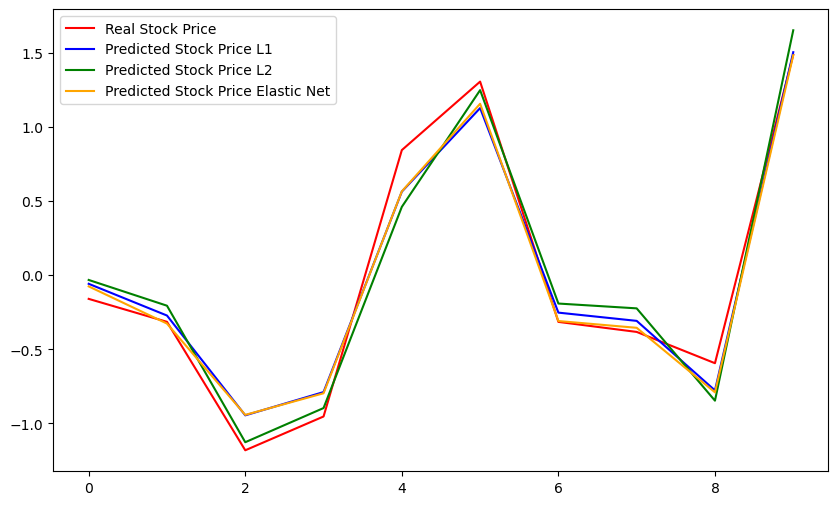

In [52]:
plt.figure(figsize=(10,6))
plt.plot(y_test1[:10], color = 'red', label = 'Real Stock Price')
plt.plot(Y_PRED.reshape(916)[:10], color = 'blue', label = 'Predicted Stock Price L1')
plt.plot(Y_PRED1.reshape(916)[:10], color = 'green', label = 'Predicted Stock Price L2')
plt.plot(Y_PRED2.reshape(916)[:10], color = 'orange', label = 'Predicted Stock Price Elastic Net')
plt.legend()
plt.show()

### Comparing all the models based on Mean Square Error

<BarContainer object of 3 artists>

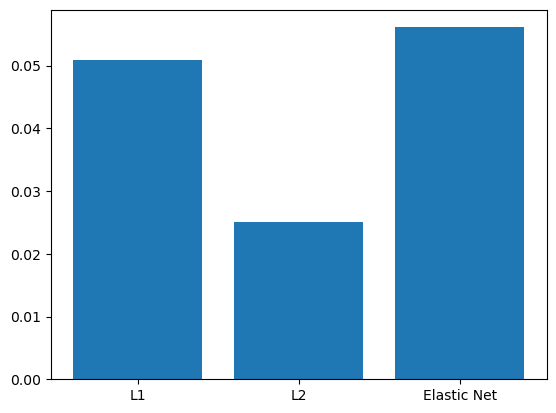

In [20]:
from sklearn.metrics import mean_squared_error
models=['L1','L2','Elastic Net']
value=[mean_squared_error(y_test,Y_PRED),mean_squared_error(y_test,Y_PRED1),mean_squared_error(y_test,Y_PRED2)]
import matplotlib.pyplot as plt
plt.bar(models,value)

### Comparing all the models based on Mean Absolute Error

<BarContainer object of 3 artists>

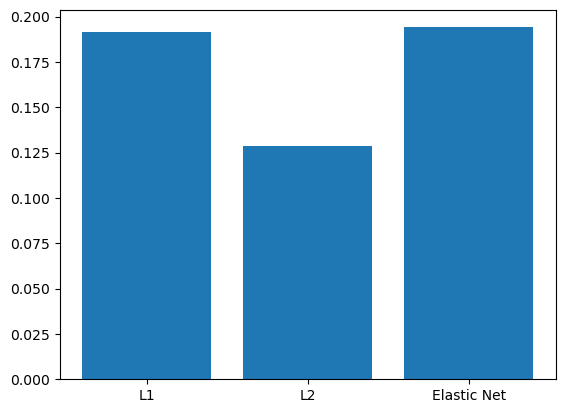

In [21]:
from sklearn.metrics import mean_absolute_error
values=[mean_absolute_error(y_test,Y_PRED),mean_absolute_error(y_test,Y_PRED1),mean_absolute_error(y_test,Y_PRED2)]
plt.bar(models,values)